## Imports

In [1]:
from arcgis.gis import GIS
from IPython.display import display
from arcgis.geometry import Geometry
import pandas as pd
from arcgis.features import GeoAccessor, GeoSeriesAccessor, FeatureLayer, Feature, FeatureSet, FeatureCollection

## Conexion

In [79]:
#gis = GIS(url="http://www.arcgis.com", username="renemorenow")
#gis = GIS(url="http://www.arcgis.com", username="williamrenem")
#gis = GIS(url="http://www.arcgis.com", username="wmoreno_project_esri_co")
gis = GIS(url='https://pythonapi.playground.esri.com/portal', username='arcgis_python', password='amazing_arcgis_123')

In [2]:
gis = GIS(profile="sgc20_desarrollo")

In [3]:
print(gis.url, gis.users.me.username)
#, gis.admin.credits.credits

https://instalacionsgcladm.esri.co/portal adminsgcv2


## Conexion SGC

In [4]:
gis = GIS(profile="sgc20_desarrollo")

In [5]:
from sgc import sgccat20lib
sgccat20lib.gisConnection = gis

<Item title:"FS_Conservacion_Edicion_41298" type:Feature Layer Collection owner:adminsgcv2>
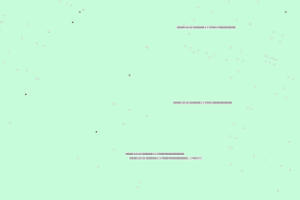

In [6]:
id_municipio = "41298"
dictparams = sgccat20lib.ObtenerParametros(id_municipio=id_municipio)
parcel_service = dictparams["PARCEL_SERVICE_CONSULTA"]
gisContentParcelService = gis.content.get(parcel_service)#FS_Conservacion_Xxxxxx
urlParcelService = gisContentParcelService.url
gisContentParcelService

## Datos generales SGC

In [7]:
lyr_direccion_name = "Direccion"
lyr_manzana = next(iter(filter(lambda x: x.properties.name.upper()=="(CC) Manzana".upper(), gisContentParcelService.layers)), None)
lyr_terreno = next(iter(filter(lambda x: x.properties.name.upper()=="Terreno".upper(), gisContentParcelService.layers)), None)
lyr_direccion = next(iter(filter(lambda x: x.properties.name.upper()==lyr_direccion_name.upper(), gisContentParcelService.layers)), None)
print("Layer:",lyr_direccion.properties.name, ", ", lyr_manzana.properties.name)
fcol_manzana = FeatureCollection.from_featureset(lyr_manzana.query(where=f"codigo like '412980102%'"))
value = fcol_manzana.query().features[0].attributes["codigo"]
print("features fcol_manzana: %s" %(len(fcol_manzana.query().features)))
rel_terreno_name = "LC_Terreno"
rel_direccion_name = "ExtDireccion"
where = f"numero_predial like '{value}%' AND estado_predio='Activo'"
predioCapa = sgccat20lib.get_features_layertable_where(
    gis,
    "{0}/{1}".format(urlParcelService, "103"),
    where,
    "numero_predial,globalid,objectid,condicion_predio",
    None,
    [rel_terreno_name,rel_direccion_name],
    ["objectid","objectid"])
rel_terreno = next(iter(filter(lambda x: x["name"].upper()==rel_terreno_name.upper(), predioCapa["Relationships"])), None)
rel_direccion = next(iter(filter(lambda x: x["name"].upper()==rel_direccion_name.upper(), predioCapa["Relationships"])), None)
objectids_terreno = ",".join(map(str, rel_terreno["objectids"])) if rel_terreno else ""
objectids_direccion = ",".join(map(str, rel_direccion["objectids"])) if rel_direccion else "1"
fcol_terreno = FeatureCollection.from_featureset(lyr_terreno.query(where=f"objectid in ({objectids_terreno})"))
fcol_direccion = FeatureCollection.from_featureset(lyr_direccion.query(where=f"objectid in ({objectids_direccion})"))
print("features fcol_terreno: %s" %(len(fcol_terreno.query().features)))
print("features fcol_direccion: %s" %(len(fcol_direccion.query().features)))

Layer: Direccion ,  (CC) Manzana
features fcol_manzana: 397
features fcol_terreno: 17
features fcol_direccion: 17


## Pregunta relacionado con:
arcgis.features.GeoSeriesAccessor.part_count

In [22]:
dict_polygon = {
    "rings": [
        [
            [-97.06138,32.837],
            [-97.06133,32.836],
            [-97.06124,32.834],
            [-97.06127,32.832],
            [-97.06138,32.837]
        ],
        [
            [-97.06326,32.759],
            [-97.06298,32.755],
            [-97.06153,32.749],
            [-97.06326,32.759]
        ]
    ],
    "spatialReference": {
        "wkid": 4326
    }
}
geom = Geometry(dict_polygon)
geom.part_count

2

In [20]:
geom.is_valid()

True

In [120]:
fs = FeatureSet([gsa])
fs

<FeatureSet> 1 features

In [121]:
sedf = pd.DataFrame.spatial.from_dict(dict(fs))
sedf

AttributeError: type object 'GeoAccessor' has no attribute 'from_dict'

In [26]:
geometry_dict = {
  "rings" : [
      [
          [-97.06138,32.837],
          [-97.06133,32.836],
          [-97.06124,32.834],
          [-97.06127,32.832],
          [-97.06138,32.837]],
      [
          [-97.06326,32.759],
          [-97.06298,32.755],
          [-97.06153,32.749],
          [-97.06326,32.759]
      ]
  ],
  "spatialReference" : {"wkid" : 4326}
}
geom = Geometry(geometry_dict)
print("type:",type(geom))
print("part_count:",geom.part_count)

type: <class 'arcgis.geometry._types.Polygon'>
part_count: 2


In [49]:
sedf = pd.DataFrame.spatial.from_layer(lyr_terreno)

SHAPE; {"rings":[[[4707458.1886999998,1801090.4791000001],[4707466.1354,1801085.0493999999],[4707466.8953,1801086.3790000007],[4707474.1988000004,1801081.2852999996],[4707472.3556000004,1801078.9177999999],[4707470.5121999998,1801076.5504999999],[4707468.5037000002,1801077.9102999996],[4707468.4418000001,1801077.9522999991],[4707468.3700000001,1801077.6766999997],[4707461.3940000003,1801065.4905999992],[4707461.2548000002,1801065.5846999995],[4707456.3354000002,1801068.9155999999],[4707463.5522999996,1801081.1469999999],[4707458.7297,1801084.7526999991],[4707453.5181,1801088.3874999993],[4707442.5407999996,1801096.0434000008],[4707445.7555,1801100.7600999996],[4707452.8449999997,1801095.7481999993],[4707458.8471999997,1801091.5035999995],[4707458.1886999998,1801090.4791000001]],[[4707472.9020999996,1801097.0835999995],[4707472.0108000003,1801095.5241],[4707464.6775000002,1801100.5752000008],[4707459.9605999999,1801103.8241000008],[4707461.3591,1801104.8114],[4707470.4271,1801098.740599

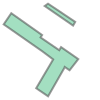

In [48]:
for i in range(5000):
    #print(type(sedf.iloc[i].SHAPE))
    #geomx = Geometry(sedf.iloc[i].SHAPE.JSON)
    #if geomx.part_count > 1:
    if sedf.iloc[i].SHAPE.part_count > 1:
        #print(type(geomx))
        #print(geomx.part_count)
        print("SHAPE;",sedf.iloc[i].SHAPE.JSON)
        print("part_count:",sedf.iloc[i].SHAPE.part_count)
        print("objectid:",sedf.iloc[i].objectid)
        break
sedf.iloc[i].SHAPE

In [42]:
geometry_dict = {
    "rings": [
        [
            [4707458.1886999998,1801090.4791000001],[4707466.1354,1801085.0493999999],[4707466.8953,1801086.3790000007],
            [4707474.1988000004,1801081.2852999996],[4707472.3556000004,1801078.9177999999],
            [4707470.5121999998,1801076.5504999999],[4707468.5037000002,1801077.9102999996],
            [4707468.4418000001,1801077.9522999991],[4707468.3700000001,1801077.6766999997],
            [4707461.3940000003,1801065.4905999992],[4707461.2548000002,1801065.5846999995],
            [4707456.3354000002,1801068.9155999999],[4707463.5522999996,1801081.1469999999],
            [4707458.7297,1801084.7526999991],[4707453.5181,1801088.3874999993],[4707442.5407999996,1801096.0434000008],
            [4707445.7555,1801100.7600999996],[4707452.8449999997,1801095.7481999993],[4707458.8471999997,1801091.5035999995],
            [4707458.1886999998,1801090.4791000001]
        ],
        [
            [4707472.9020999996,1801097.0835999995],[4707472.0108000003,1801095.5241],[4707464.6775000002,1801100.5752000008],
            [4707459.9605999999,1801103.8241000008],[4707461.3591,1801104.8114],[4707470.4271,1801098.7405999992],
            [4707472.9020999996,1801097.0835999995]
        ]
    ]
    ,"spatialReference":{"wkid":9377,"latestWkid":9377}
}
geom = Geometry(geometry_dict)
print("type:",type(geom))
print("part_count:",geom.part_count)

type: <class 'arcgis.geometry._types.Polygon'>
part_count: 2


### asi trabaja part_count

In [55]:
gm = {"rings": [[[]],[[]],[]]}
print("part_count:",len(gm["rings"]))

part_count: 3


## analizar un geocode masivo que metodo se usa?

### batch_geocode:

In [57]:
from arcgis.geocoding import batch_geocode

In [80]:
from arcgis.geocoding import get_geocoders
geocoder = get_geocoders(gis)
geocoder = geocoder[0]
geocoder

<Geocoder url:"https://pythonapi.playground.esri.com/portal/sharing/servers/edf162cfa4b84cb9bb8e0fa33afb767a/rest/services/World/GeocodeServer">

In [63]:
direcciones = [f.attributes["nombre_predio"] for f in fcol_direccion.query().features]
values_direcciones = "'" + "', '".join(direcciones) + "'"
values_direcciones

"'C 7 16 33', 'C 7 16 29', 'C 7 16 21', 'C 7 16 05 13 K 16 6 41', 'K 16 6 27', 'K 17 6 10', 'K 17 6 20', 'K 17 6 30', 'K 16 6 05', 'K 16 6 17', 'K 17 6 18', 'K 16 6 11', 'C 6 16 22', 'C 6 16 28', 'K 17 6 04', 'C 6 16 18', 'C 6 16 16'"

In [96]:
try:
    v_batch_geocode = batch_geocode(addresses=values_direcciones, as_featureset = True, geocoder=geocoder)
except Exception as ex:
    print(str(ex))
    addresses = ["380 New York St, Redlands, CA",
                 "1 World Way, Los Angeles, CA",
                 "1200 Getty Center Drive, Los Angeles, CA",
                 "5905 Wilshire Boulevard, Los Angeles, CA",
                 "100 Universal City Plaza, Universal City, CA 91608",
                 "4800 Oak Grove Dr, Pasadena, CA 91109"]
    v_batch_geocode = batch_geocode(addresses = addresses,
                                    as_featureset = True,
                                    match_out_of_range = True,
                                    geocoder=geocoder)
fcol_bg = FeatureCollection.from_featureset(v_batch_geocode.query())
bg_map = gis.map("Colombia")
bg_map.add_layer(fcol_bg)
bg_map.zoom_to_layer(v_batch_geocode)
bg_map

AttributeError: 'FeatureSet' object has no attribute 'query'

In [98]:
print(type(v_batch_geocode))
fcol_bg = FeatureCollection.from_featureset(v_batch_geocode)

<class 'arcgis.features.feature.FeatureSet'>


KeyError: 'geometryType'

In [106]:
for f in v_batch_geocode.features:
    print(type(f.geometry))
    BREAK
    if f.get("geometry"):
        print(f)

<class 'NoneType'>


NameError: name 'BREAK' is not defined

In [93]:
type(v_batch_geocode)

arcgis.features.feature.FeatureSet

In [90]:
v_batch_geocode

[{'address': '',
  'score': 0,
  'attributes': {'ResultID': 0,
   'Loc_name': '',
   'Status': 'U',
   'Score': 0,
   'Match_addr': '',
   'LongLabel': '',
   'ShortLabel': '',
   'Addr_type': '',
   'Type': '',
   'PlaceName': '',
   'Place_addr': '',
   'Phone': '',
   'URL': '',
   'Rank': 0,
   'AddBldg': '',
   'AddNum': '',
   'AddNumFrom': '',
   'AddNumTo': '',
   'AddRange': '',
   'Side': '',
   'StPreDir': '',
   'StPreType': '',
   'StName': '',
   'StType': '',
   'StDir': '',
   'BldgType': '',
   'BldgName': '',
   'LevelType': '',
   'LevelName': '',
   'UnitType': '',
   'UnitName': '',
   'SubAddr': '',
   'StAddr': '',
   'Block': '',
   'Sector': '',
   'Nbrhd': '',
   'District': '',
   'City': '',
   'MetroArea': '',
   'Subregion': '',
   'Region': '',
   'RegionAbbr': '',
   'Territory': '',
   'Zone': '',
   'Postal': '',
   'PostalExt': '',
   'Country': '',
   'CntryName': '',
   'LangCode': '',
   'Distance': 0,
   'X': 0.0,
   'Y': 0.0,
   'DisplayX': 0.0,


In [69]:
batch_geocode?